In [2]:
import pandas as pd

# Load datasets
links = pd.read_csv('links.csv')
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')

# Display basic information about each dataset
print("Links dataset:")
print(links.info())

print("\nMovies dataset:")
print(movies.info())

print("\nRatings dataset:")
print(ratings.info())

print("\nTags dataset:")
print(tags.info())


Links dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB
None

Movies dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None

Ratings dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    

In [3]:
# Assuming there are missing values, let's handle them by either imputing or removing
# For the sake of simplicity, let's impute missing ratings with the mean rating

# Impute missing values in the 'ratings' dataset
mean_rating = ratings['rating'].mean()
ratings['rating'].fillna(mean_rating, inplace=True)

# Check for missing values in other datasets and handle them if needed

# Now, you might want to check and handle duplicates, outliers, or other issues based on your data analysis

# Display basic statistics after cleaning
print("After cleaning:")
print(ratings.describe())

# Save the cleaned data to new CSV files if desired
ratings.to_csv('cleaned_ratings.csv', index=False)
# Repeat for other datasets as needed


After cleaning:
              userId        movieId         rating     timestamp
count  100836.000000  100836.000000  100836.000000  1.008360e+05
mean      326.127564   19435.295718       3.501557  1.205946e+09
std       182.618491   35530.987199       1.042529  2.162610e+08
min         1.000000       1.000000       0.500000  8.281246e+08
25%       177.000000    1199.000000       3.000000  1.019124e+09
50%       325.000000    2991.000000       3.500000  1.186087e+09
75%       477.000000    8122.000000       4.000000  1.435994e+09
max       610.000000  193609.000000       5.000000  1.537799e+09


Basic Statistics:
              userId        movieId         rating     timestamp
count  100836.000000  100836.000000  100836.000000  1.008360e+05
mean      326.127564   19435.295718       3.501557  1.205946e+09
std       182.618491   35530.987199       1.042529  2.162610e+08
min         1.000000       1.000000       0.500000  8.281246e+08
25%       177.000000    1199.000000       3.000000  1.019124e+09
50%       325.000000    2991.000000       3.500000  1.186087e+09
75%       477.000000    8122.000000       4.000000  1.435994e+09
max       610.000000  193609.000000       5.000000  1.537799e+09


/Users/menna/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/menna/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


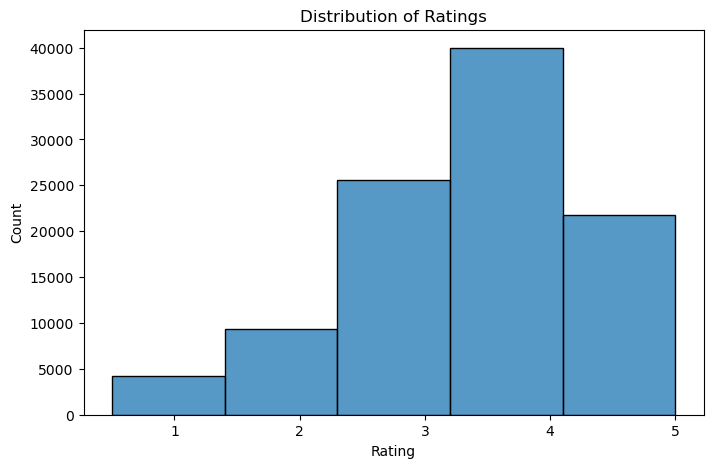

/Users/menna/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/menna/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


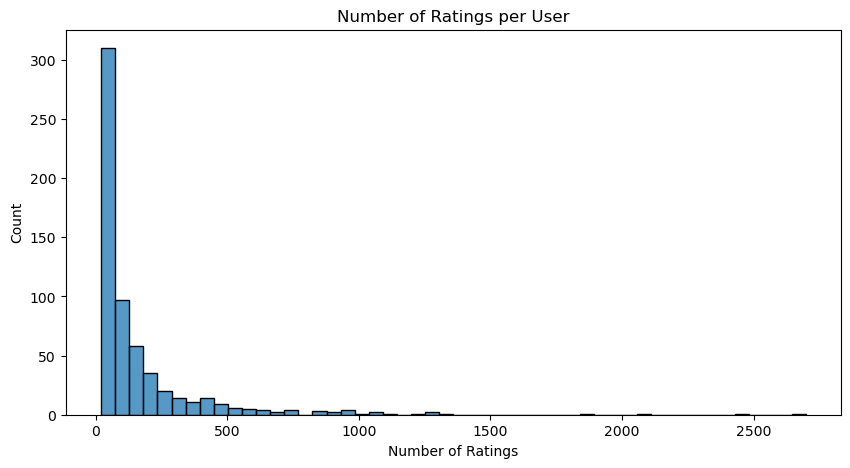

/Users/menna/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/menna/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


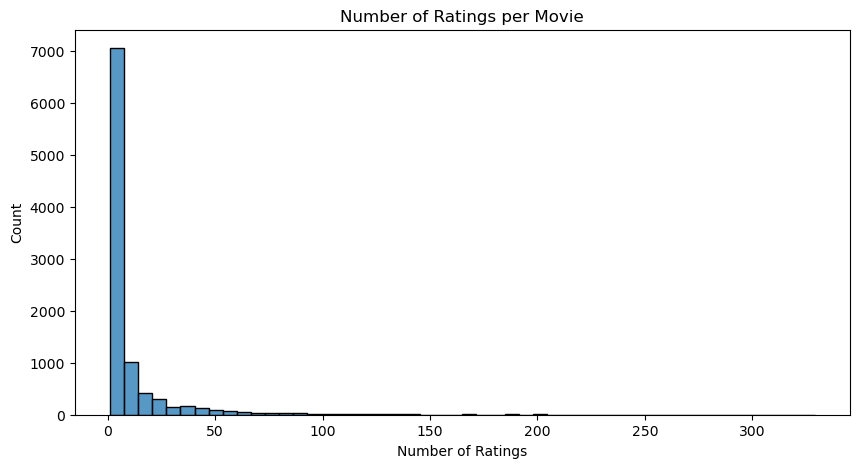

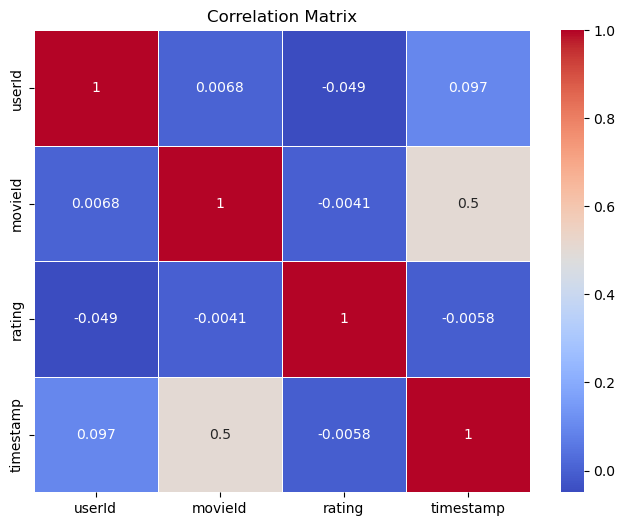

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already loaded and cleaned the data

# Basic statistics
print("Basic Statistics:")
print(ratings.describe())

# Distribution of ratings
plt.figure(figsize=(8, 5))
sns.histplot(ratings['rating'], bins=5, kde=False)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Number of ratings per user
user_ratings_count = ratings.groupby('userId')['rating'].count()
plt.figure(figsize=(10, 5))
sns.histplot(user_ratings_count, bins=50, kde=False)
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Count')
plt.show()

# Number of ratings per movie
movie_ratings_count = ratings.groupby('movieId')['rating'].count()
plt.figure(figsize=(10, 5))
sns.histplot(movie_ratings_count, bins=50, kde=False)
plt.title('Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Count')
plt.show()

# Additional exploratory visualizations as needed

# Correlation matrix (if applicable)
correlation_matrix = ratings.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


In [6]:
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import KNNBasic
from surprise import accuracy

# Load data
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# Split data
trainset, testset = train_test_split(data, test_size=0.2)

# Create and train the model
sim_options = {'name': 'cosine', 'user_based': False}
model = KNNBasic(sim_options=sim_options)
model.fit(trainset)

# Make predictions
predictions = model.test(testset)

# Evaluate the model
accuracy.rmse(predictions)


Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9784


0.9784059558410702

In [7]:
# Assuming 'model' is your trained collaborative filtering model
user_id = 1  # Replace with the target user's ID
items_to_recommend = [item for item in movies['movieId'].unique() if item not in ratings[ratings['userId'] == user_id]['movieId'].unique()]

# Make predictions for items not yet rated by the user
predictions = [model.predict(user_id, item) for item in items_to_recommend]

# Sort predictions by estimated rating in descending order
recommendations = sorted(predictions, key=lambda x: x.est, reverse=True)

# Print the top N recommendations
top_n = 10
for i, recommendation in enumerate(recommendations[:top_n]):
    print(f"Rank {i + 1}: MovieID {recommendation.iid} - Estimated Rating: {recommendation.est}")


Rank 1: MovieID 1140 - Estimated Rating: 5
Rank 2: MovieID 1519 - Estimated Rating: 5
Rank 3: MovieID 2585 - Estimated Rating: 5
Rank 4: MovieID 2896 - Estimated Rating: 5
Rank 5: MovieID 3106 - Estimated Rating: 5
Rank 6: MovieID 3795 - Estimated Rating: 5
Rank 7: MovieID 3899 - Estimated Rating: 5
Rank 8: MovieID 5107 - Estimated Rating: 5
Rank 9: MovieID 5181 - Estimated Rating: 5
Rank 10: MovieID 5696 - Estimated Rating: 5


In [8]:
# Assuming 'model' is your trained collaborative filtering model
user_id = 1  # Replace with the target user's ID
items_to_recommend = [item for item in movies['movieId'].unique() if item not in ratings[ratings['userId'] == user_id]['movieId'].unique()]

# Make predictions for items not yet rated by the user
predictions = [model.predict(user_id, item) for item in items_to_recommend]

# Sort predictions by estimated rating in descending order
recommendations = sorted(predictions, key=lambda x: x.est, reverse=True)

# Print the top N recommendations with movie titles
top_n = 10
for i, recommendation in enumerate(recommendations[:top_n]):
    movie_title = movies[movies['movieId'] == recommendation.iid]['title'].values[0]
    print(f"Rank {i + 1}: Movie Title: {movie_title} - MovieID {recommendation.iid} - Estimated Rating: {recommendation.est}")


Rank 1: Movie Title: Entertaining Angels: The Dorothy Day Story (1996) - MovieID 1140 - Estimated Rating: 5
Rank 2: Movie Title: Broken English (1996) - MovieID 1519 - Estimated Rating: 5
Rank 3: Movie Title: Lovers of the Arctic Circle, The (Los Amantes del Círculo Polar) (1998) - MovieID 2585 - Estimated Rating: 5
Rank 4: Movie Title: Alvarez Kelly (1966) - MovieID 2896 - Estimated Rating: 5
Rank 5: Movie Title: Come See the Paradise (1990) - MovieID 3106 - Estimated Rating: 5
Rank 6: Movie Title: Five Senses, The (1999) - MovieID 3795 - Estimated Rating: 5
Rank 7: Movie Title: Circus (2000) - MovieID 3899 - Estimated Rating: 5
Rank 8: Movie Title: Hart's War (2002) - MovieID 5107 - Estimated Rating: 5
Rank 9: Movie Title: Hangar 18 (1980) - MovieID 5181 - Estimated Rating: 5
Rank 10: Movie Title: Urban Cowboy (1980) - MovieID 5696 - Estimated Rating: 5


In [9]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from fuzzywuzzy import process

# Sample movies DataFrame
movies = pd.DataFrame({
    'movieId': [1, 2, 3, 4],
    'title': ['Movie A', 'Movie B', 'Movie C', 'Movie D'],
    'genres': ['Action, Adventure', 'Drama, Romance', 'Action, Drama', 'Comedy']
})

# User searches for a movie
searched_title = 'Tango (1998)'  # Replace with the actual movie title the user is searching for

# Use fuzzy string matching to find the closest match in the dataset
matched_titles_with_scores = process.extractBests(searched_title, movies['title'], score_cutoff=90)

# Check if any matches are found
if matched_titles_with_scores:
    # Take the first match (highest score) and unpack the result
    matched_title, score = matched_titles_with_scores[0]

    # Find the index of the matched movie
    searched_index = movies.index[movies['title'] == matched_title].tolist()[0]

    # Use CountVectorizer to convert genres into a matrix of token counts
    vectorizer = CountVectorizer()
    genres_matrix = vectorizer.fit_transform(movies['genres'])

    # Compute the cosine similarity between movies based on genres
    cosine_similarities = cosine_similarity(genres_matrix, genres_matrix)

    # Get the similarity scores for the searched movie
    similarities_with_searched = list(enumerate(cosine_similarities[searched_index]))

    # Sort movies based on similarity scores
    similar_movies = sorted(similarities_with_searched, key=lambda x: x[1], reverse=True)

    # Display recommended movies
    print(f"Movies similar to '{searched_title}' (Match Score: {score}):")
    for i, (movie_index, similarity_score) in enumerate(similar_movies[1:]):  # Exclude the searched movie itself
        recommended_title = movies.iloc[movie_index]['title']
        print(f"{i + 1}: {recommended_title} (Similarity Score: {similarity_score:.2f})")

else:
    print(f"Movie '{searched_title}' not found or no close matches in the dataset.")






Movie 'Tango (1998)' not found or no close matches in the dataset.


In [10]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from fuzzywuzzy import fuzz

# Sample movies DataFrame
movies = pd.DataFrame({
    'movieId': [1, 2, 3, 4],
    'title': ['Movie A', 'Movie B', 'Movie C', 'Movie D'],
    'genres': ['Action|Adventure', 'Drama|Romance', 'Action|Drama', 'Comedy']
})

# User searches for a movie
searched_title = 'Tango (1998)'  # Replace with the actual movie title the user is searching for

# Use fuzzy string matching to find the closest match in the dataset
matched_titles_with_scores = [(title, fuzz.ratio(searched_title.lower(), title.lower())) for title in movies['title']]

# Filter matches with a reasonable score
matched_titles_with_scores = [(title, score) for title, score in matched_titles_with_scores if score > 70]

# Check if any matches are found
if matched_titles_with_scores:
    # Take the first match (highest score) and unpack the result
    matched_title, score = max(matched_titles_with_scores, key=lambda x: x[1])

    # Find the index of the matched movie
    searched_index = movies.index[movies['title'] == matched_title].tolist()[0]

    # Use CountVectorizer to convert genres into a matrix of token counts
    vectorizer = CountVectorizer()
    genres_matrix = vectorizer.fit_transform(movies['genres'])

    # Compute the cosine similarity between movies based on genres
    cosine_similarities = cosine_similarity(genres_matrix, genres_matrix)

    # Get the similarity scores for the searched movie
    similarities_with_searched = list(enumerate(cosine_similarities[searched_index]))

    # Sort movies based on similarity scores
    similar_movies = sorted(similarities_with_searched, key=lambda x: x[1], reverse=True)

    # Display recommended movies
    print(f"Movies similar to '{searched_title}' (Match Score: {score}):")
    for i, (movie_index, similarity_score) in enumerate(similar_movies[1:]):  # Exclude the searched movie itself
        recommended_title = movies.iloc[movie_index]['title']
        print(f"{i + 1}: {recommended_title} (Similarity Score: {similarity_score:.2f})")

else:
    print(f"Movie '{searched_title}' not found or no close matches in the dataset.")


Movie 'Tango (1998)' not found or no close matches in the dataset.


In [16]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from fuzzywuzzy import fuzz

# Sample movies DataFrame
movies = pd.DataFrame({
    'movieId': [1, 2, 3, 4],
    'title': ['Movie A', 'Movie B', 'Movie C', 'Movie D'],
    'genres': ['Action|Adventure', 'Drama|Romance', 'Action|Drama', 'Comedy'],
    'year': [2010, 2015, 2010, 2005],
    'director': ['Director A', 'Director B', 'Director A', 'Director C']
})

# User searches for a movie
searched_title = 'Tango (1998)'  # Replace with the actual movie title the user is searching for

# Use fuzzy string matching to find the closest match in the dataset
matched_titles_with_scores = [(movie, fuzz.ratio(searched_title.lower(), movie['title'].lower())) for _, movie in movies.iterrows()]

# Filter matches with a more lenient score
matched_titles_with_scores = [(movie, score) for movie, score in matched_titles_with_scores if score > 60]  # Adjust threshold as needed

# Check if any matches are found
if matched_titles_with_scores:
    # Take the best match (highest score) and unpack the result
    matched_movie, score = max(matched_titles_with_scores, key=lambda x: x[1])

    # Find the index of the matched movie
    searched_index = matched_movie.name

    # Define a function to calculate similarity based on multiple features
    def calculate_similarity(movie, searched_index):
        title_similarity = fuzz.ratio(searched_title.lower(), movie['title'].lower())
        genres_similarity = cosine_similarity(genres_matrix[searched_index], genres_matrix[movie.name])[0][0]
        year_similarity = 1 - abs(movie['year'] - movies.loc[searched_index, 'year']) / max(movie['year'], movies.loc[searched_index, 'year'])


        # Add more features for similarity calculation if needed

        # Weighted average of similarities
        weighted_similarity = 0.4 * title_similarity + 0.4 * genres_similarity + 0.2 * year_similarity
        return weighted_similarity

    # Use the calculate_similarity function
    matched_titles_with_scores = [(movie, calculate_similarity(movie, searched_index)) for _, movie in movies.iterrows()]

    # Filter matches with a reasonable score
    matched_titles_with_scores = [(movie, score) for movie, score in matched_titles_with_scores if score > 0.6]  # Adjust threshold as needed

    # Check if any matches are found
    if matched_titles_with_scores:
        # Take the best match (highest score) and unpack the result
        matched_movie, score = max(matched_titles_with_scores, key=lambda x: x[1])

        # Find the index of the matched movie
        searched_index = matched_movie.name

        # (rest of the code for recommending similar movies based on genres)
        print(f"Best match: '{matched_movie['title']}' (Score: {score:.2f})")

    else:
        print(f"No close matches in the dataset after further similarity calculations.")

else:
    print(f"No close matches in the dataset.")





No close matches in the dataset.
